**📦 Step 1: Import Libraries & Load Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# Load cleaned data
drive.mount('/content/drive')

# Set working directory
working_dir = '/content/drive/MyDrive/Colab Notebooks/AI-Applications-Portfolio/amazon-sentiment-analysis'
file_path = f"{working_dir}/cleaned_amazon_data.csv"

df = pd.read_csv(file_path)
print("✅ Data loaded successfully!")
print(f"📊 Shape: {df.shape}")

Mounted at /content/drive
✅ Data loaded successfully!
📊 Shape: (269, 29)


**🔍 Step 2: Basic Brand Overview**

🏷️ Brand Distribution:
Total brands: 229
Top 10 brands represent 10.8% of products


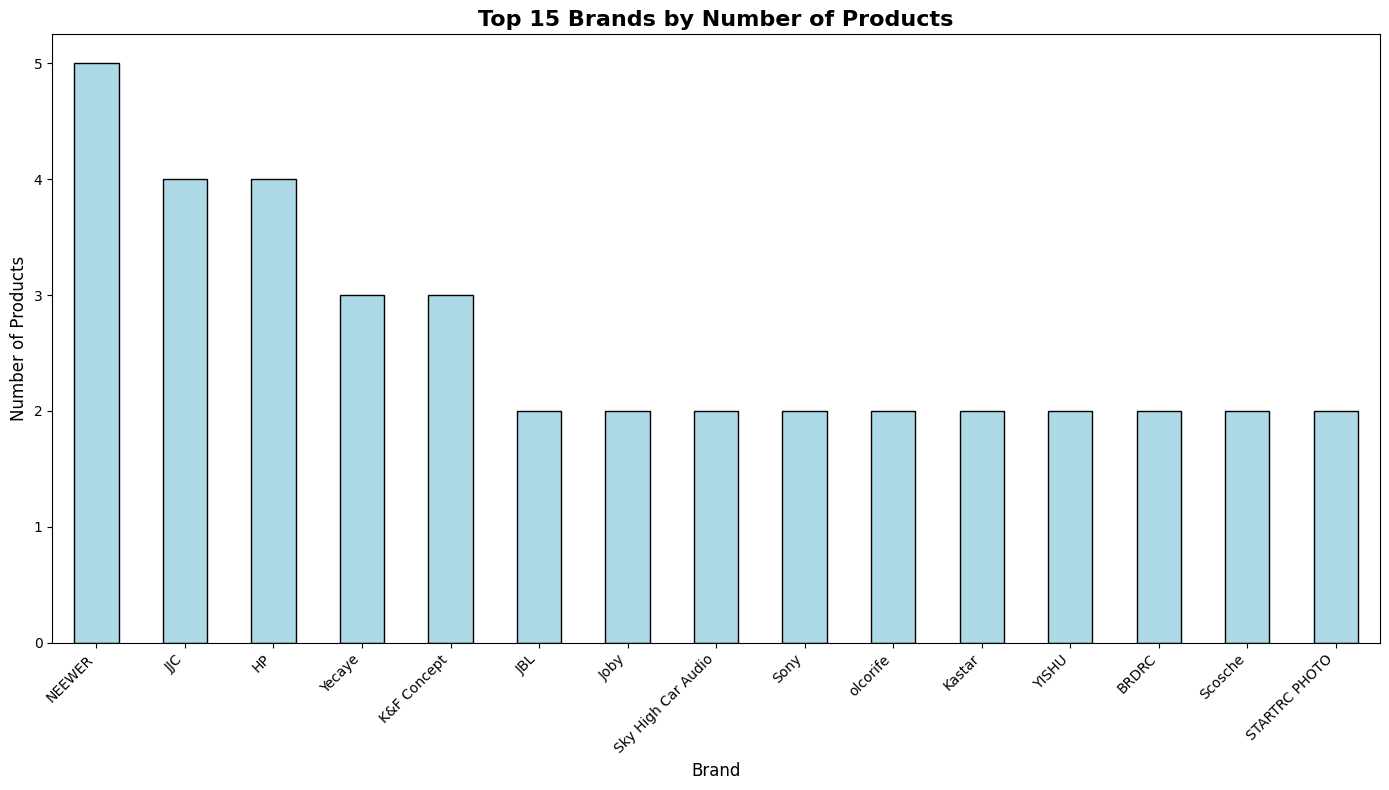

In [4]:
brand_stats = df['brand'].value_counts()
print("🏷️ Brand Distribution:")
print(f"Total brands: {len(brand_stats)}")
print(f"Top 10 brands represent {brand_stats.head(10).sum()/len(df)*100:.1f}% of products")

plt.figure(figsize=(14, 8))
brand_stats.head(15).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 15 Brands by Number of Products', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**💰 Step 3: Price Analysis by Brand**

In [5]:
brand_price_analysis = df.groupby('brand').agg({
    'price': ['mean', 'median', 'std', 'count'],
    'rating': 'mean',
    'review_count': 'sum'
}).round(2)

brand_price_analysis.columns = ['avg_price', 'median_price', 'price_std', 'product_count', 'avg_rating', 'total_reviews']
brand_price_analysis = brand_price_analysis.sort_values('avg_price', ascending=False)

print("📈 Top 10 Most Expensive Brands:")
print(brand_price_analysis.head(10))
print("\n📉 Top 10 Cheapest Brands:")
print(brand_price_analysis.tail(10))

📈 Top 10 Most Expensive Brands:
                avg_price  median_price  price_std  product_count  avg_rating  \
brand                                                                           
Tripp Lite         149.00        149.00        NaN              1        4.50   
Yealink            143.45        143.45      50.28              2        4.25   
HollyView          139.00        139.00        NaN              1        4.60   
reMarkable         129.00        129.00        NaN              1        4.50   
vnilrgle           119.98        119.98        NaN              1        5.00   
Audio-Technica     119.00        119.00        NaN              1        4.70   
PAIYULE            110.50        110.50        NaN              1        4.60   
DJI                107.90        107.90        NaN              1        4.50   
Tuceng              94.99         94.99        NaN              1        4.50   
TRUE IMAGE          89.99         89.99        NaN              1        4.60

**📊 Step 4: Visualization - Price vs Rating by Brand**

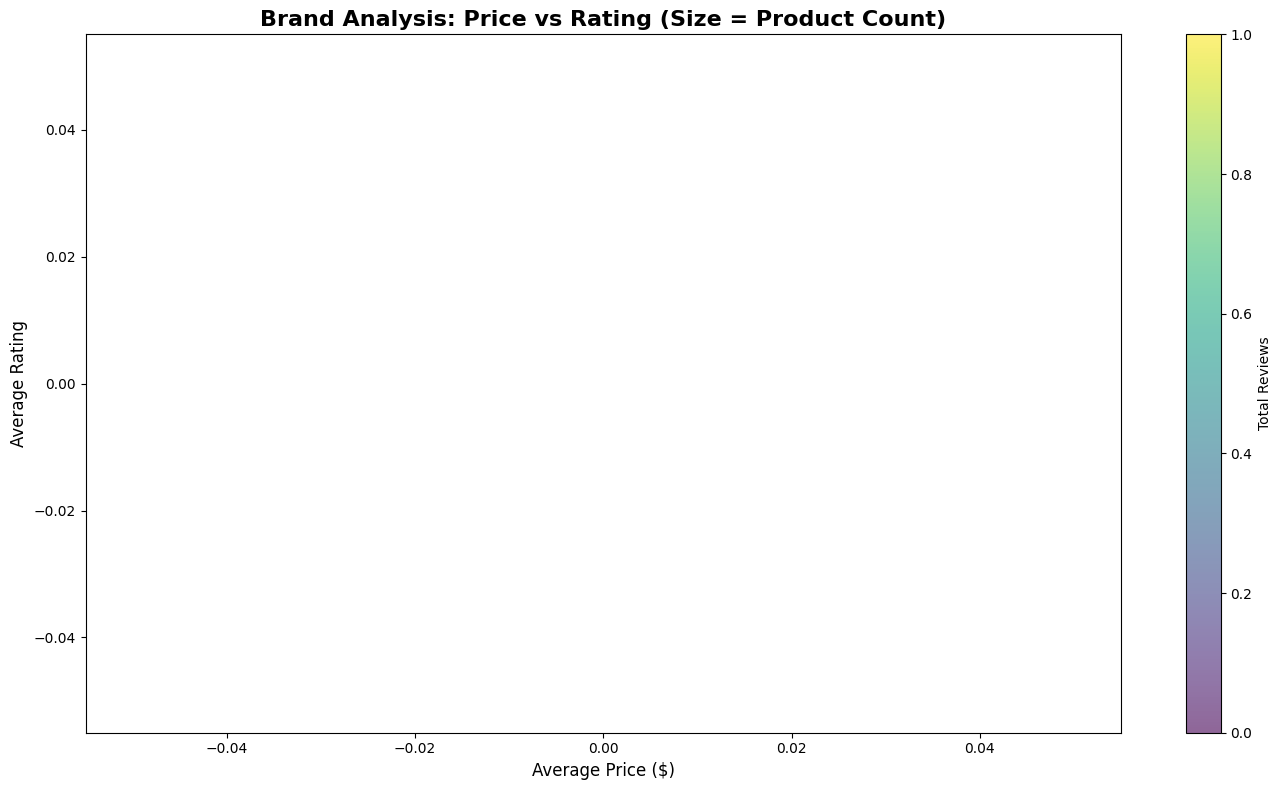

In [6]:
plt.figure(figsize=(14, 8))
top_brands = brand_price_analysis[brand_price_analysis['product_count'] > 5].head(20)

scatter = plt.scatter(top_brands['avg_price'], top_brands['avg_rating'],
                     s=top_brands['product_count']*10,
                     c=top_brands['total_reviews'],
                     alpha=0.6, cmap='viridis')

plt.colorbar(scatter, label='Total Reviews')
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Brand Analysis: Price vs Rating (Size = Product Count)', fontsize=16, fontweight='bold')

# Annotate top brands
for i, brand in enumerate(top_brands.index):
    plt.annotate(brand, (top_brands['avg_price'].iloc[i], top_brands['avg_rating'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

**⭐ Step 5: Rating Analysis by Brand**

In [7]:
brand_rating_analysis = df.groupby('brand').agg({
    'rating': ['mean', 'count', 'std'],
    'price': 'mean'
}).round(2)

brand_rating_analysis.columns = ['avg_rating', 'product_count', 'rating_std', 'avg_price']
brand_rating_analysis = brand_rating_analysis[brand_rating_analysis['product_count'] >= 3]

print("🏆 Top 10 Highest Rated Brands (min 3 products):")
print(brand_rating_analysis.sort_values('avg_rating', ascending=False).head(10))

print("\n⚠️ Bottom 10 Lowest Rated Brands (min 3 products):")
print(brand_rating_analysis.sort_values('avg_rating').head(10))

🏆 Top 10 Highest Rated Brands (min 3 products):
             avg_rating  product_count  rating_std  avg_price
brand                                                        
HP                 4.70              4        0.08      61.64
K&F Concept        4.57              3        0.06      31.40
Yecaye             4.53              3        0.06       9.32
NEEWER             4.52              5        0.13      58.26
JJC                4.50              4        0.22      11.86

⚠️ Bottom 10 Lowest Rated Brands (min 3 products):
             avg_rating  product_count  rating_std  avg_price
brand                                                        
JJC                4.50              4        0.22      11.86
NEEWER             4.52              5        0.13      58.26
Yecaye             4.53              3        0.06       9.32
K&F Concept        4.57              3        0.06      31.40
HP                 4.70              4        0.08      61.64


**📈 Step 6: Brand Performance Metrics**

In [8]:
brand_performance = df.groupby('brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'review_count': ['sum', 'mean'],
    'title': 'count'
}).round(2)

brand_performance.columns = ['avg_price', 'avg_rating', 'total_reviews', 'avg_reviews_per_product', 'product_count']

# Calculate brand value score (custom metric)
brand_performance['value_score'] = (brand_performance['avg_rating'] *
                                   brand_performance['avg_reviews_per_product'] /
                                   brand_performance['avg_price']).round(3)

print("🎯 Top 10 Brands by Value Score (Rating × Reviews / Price):")
print(brand_performance.nlargest(10, 'value_score')[['avg_rating', 'avg_reviews_per_product', 'avg_price', 'value_score']])

🎯 Top 10 Brands by Value Score (Rating × Reviews / Price):
               avg_rating  avg_reviews_per_product  avg_price  value_score
brand                                                                     
Alestor              4.80                  46887.0       9.99    22528.288
Ferilinso            4.30                  23712.0       5.82    17519.175
Amazon Basics        4.70                  41673.0      11.66    16797.864
Anker                4.65                  45990.0      14.48    14768.888
YUWAKAYI             4.30                  25679.0       9.99    11053.023
SanDisk              4.70                   8467.0       3.86    10309.560
YISHU                4.65                  22208.5      10.49     9844.569
JBL                  4.80                  27636.5      14.99     8849.580
DDJ                  4.60                  10208.0       5.94     7905.185
Yecaye               4.53                  16104.0       9.32     7827.373


**📊 Step 7: Category Analysis within Brands**

In [9]:
brand_category_analysis = df.groupby(['brand', 'category_name']).size().unstack(fill_value=0)
print("🔄 Brand Category Distribution:")

# Top brands and their main categories
top_brands = df['brand'].value_counts().head(10).index
for brand in top_brands:
    main_categories = brand_category_analysis.loc[brand].nlargest(3)
    print(f"{brand}: {', '.join([f'{cat}({count})' for cat, count in main_categories.items()])}")

🔄 Brand Category Distribution:
NEEWER: microphones_8882489011(2), action_camera_accessories_75364150011(1), camcorder_accessories_505106(1)
JJC: viewfinders_14015021(2), binocular,_camera_camcorder_straps_3345831(1), filter_cases_3346191(1)
HP: printer_parts_accessories_172636(2), office_electronics_accessories_172575(1), printer_ink_toner_172638(1)
Yecaye: cable_raceways_6577543011(2), cord_management_11042051(1), accessories_15735151(0)
K&F Concept: bags_cases_172437(1), filters_accessories_499262(1), tripods_monopods_499306(1)
JBL: portable_speakers_docks_689637011(2), accessories_15735151(0), accessories_2407755011(0)
Joby: tripods_monopods_499306(2), accessories_15735151(0), accessories_2407755011(0)
Sky High Car Audio: installation_services_2632819011(2), accessories_15735151(0), accessories_2407755011(0)
Sony: blank_video_media_172840(1), portable_speakers_docks_689637011(1), accessories_15735151(0)
olcorife: power_strips_surge_protectors_17854127011(2), accessories_15735151(0),

**🎨 Step 8: Comprehensive Visualization Dashboard**

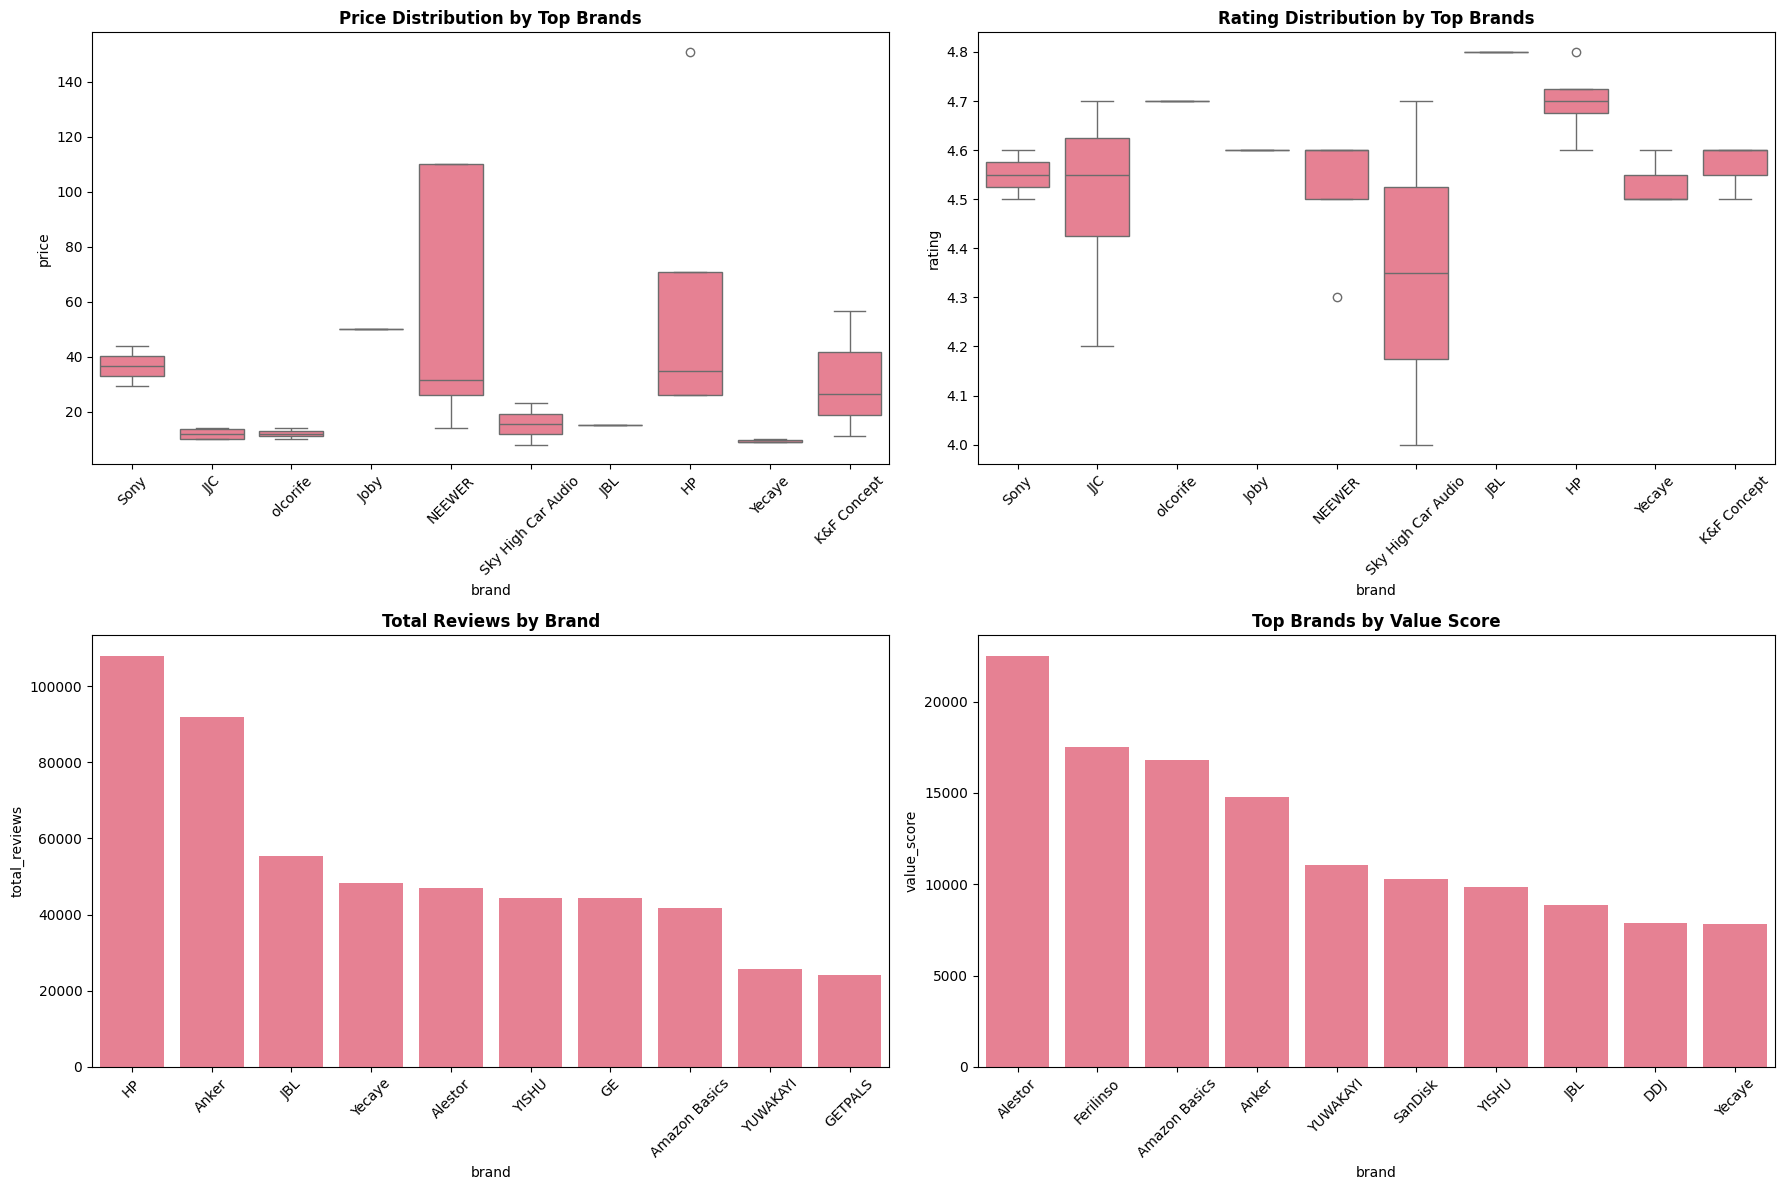

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Price distribution by top brands
top_10_brands = df['brand'].value_counts().head(10).index
brand_price_data = df[df['brand'].isin(top_10_brands)]
sns.boxplot(data=brand_price_data, x='brand', y='price', ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Top Brands', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Rating distribution by top brands
sns.boxplot(data=brand_price_data, x='brand', y='rating', ax=axes[0,1])
axes[0,1].set_title('Rating Distribution by Top Brands', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Review count by brand
sns.barplot(data=brand_price_analysis.nlargest(10, 'total_reviews').reset_index(),
            x='brand', y='total_reviews', ax=axes[1,0])
axes[1,0].set_title('Total Reviews by Brand', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Value score comparison
sns.barplot(data=brand_performance.nlargest(10, 'value_score').reset_index(),
            x='brand', y='value_score', ax=axes[1,1])
axes[1,1].set_title('Top Brands by Value Score', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(f"/{working_dir}/brand_analysis_dashboard.png")
plt.show()

**💾 Step 9: Save Brand Analysis Results**

In [11]:
brand_analysis_results = brand_performance.sort_values('value_score', ascending=False)
brand_analysis_results.to_csv(f"/{working_dir}/brand_analysis_results.csv")

print("✅ Brand analysis completed successfully!")
print("📊 Key Insights:")
print(f"- Top brand by value: {brand_analysis_results.index[0]}")
print(f"- Most expensive brand: {brand_price_analysis.index[0]} (${brand_price_analysis.iloc[0]['avg_price']})")
print(f"- Highest rated brand: {brand_rating_analysis.index[0]} ({brand_rating_analysis.iloc[0]['avg_rating']}⭐)")

✅ Brand analysis completed successfully!
📊 Key Insights:
- Top brand by value: Alestor
- Most expensive brand: Tripp Lite ($149.0)
- Highest rated brand: HP (4.7⭐)
